In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
diabetesData = pd.read_csv('diabetes.csv')

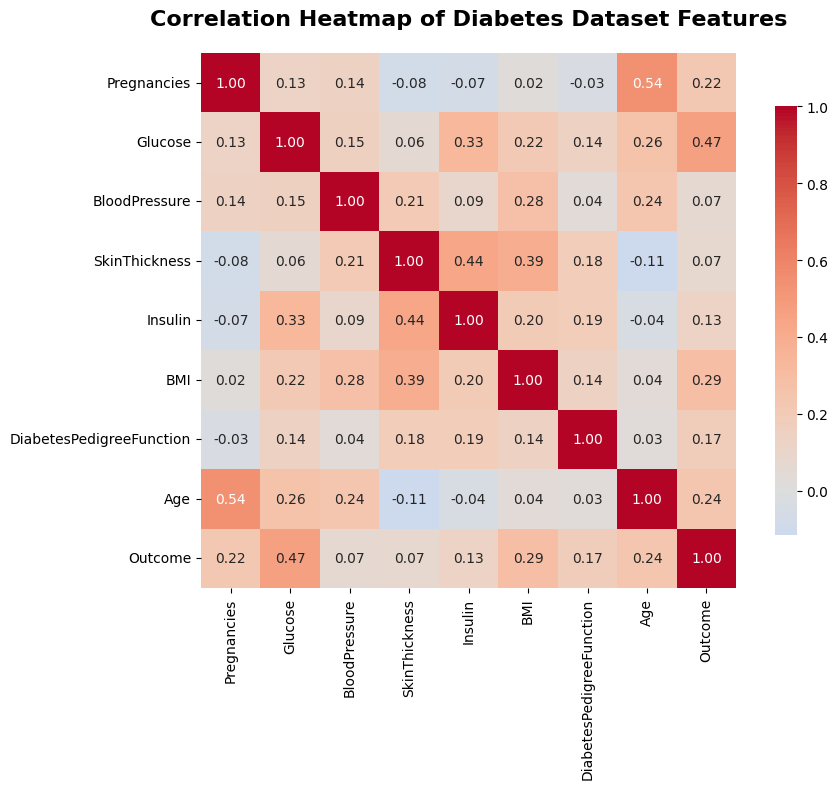

In [8]:
# Calculate correlation matrix
correlation_matrix = diabetesData.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           
            cmap='coolwarm',     
            center=0,            
            square=True,        
            fmt='.2f',           
            cbar_kws={'shrink': 0.8})  

plt.title('Correlation Heatmap of Diabetes Dataset Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

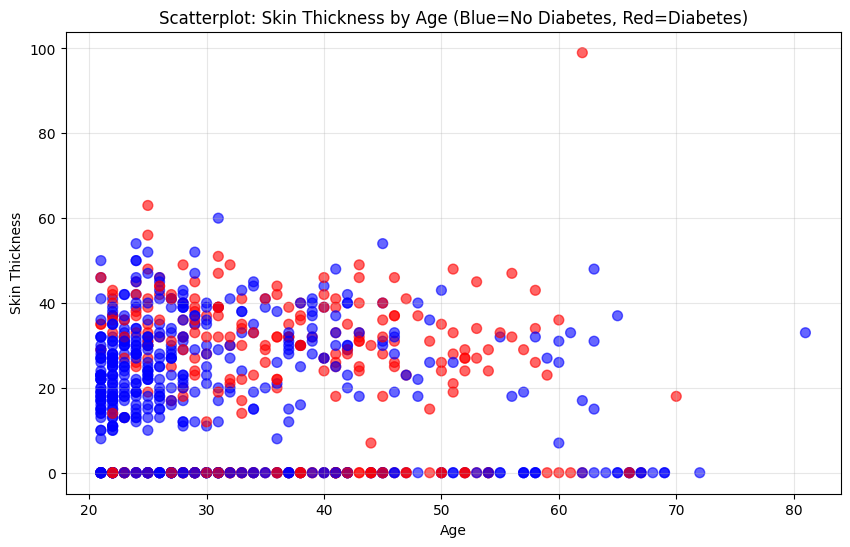

In [9]:
plt.figure(figsize=(10, 6))
colors = ['blue' if outcome == 0 else 'red' for outcome in diabetesData['Outcome']]
plt.scatter(diabetesData['Age'], diabetesData['SkinThickness'], 
           c=colors, alpha=0.6, s=50)
plt.xlabel('Age')
plt.ylabel('Skin Thickness')
plt.title('Scatterplot: Skin Thickness by Age (Blue=No Diabetes, Red=Diabetes)')
plt.grid(True, alpha=0.3)
plt.show()

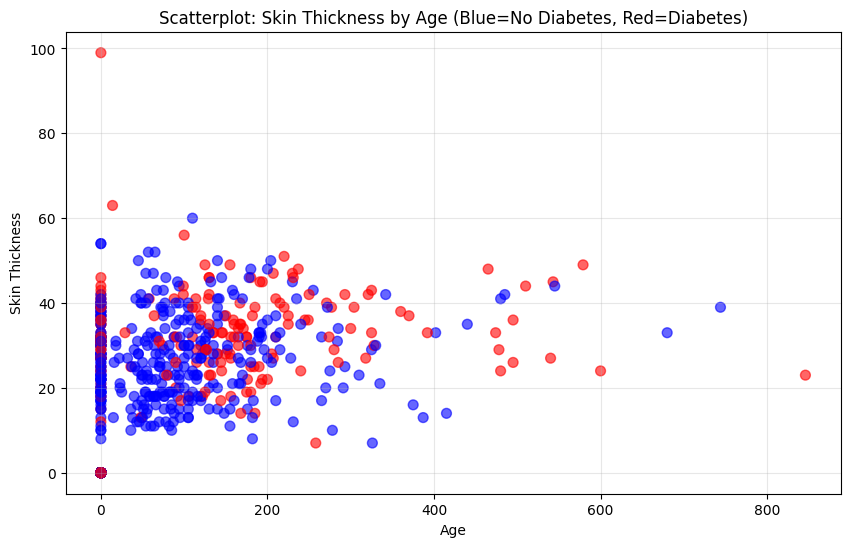

In [10]:
plt.figure(figsize=(10, 6))
colors = ['blue' if outcome == 0 else 'red' for outcome in diabetesData['Outcome']]
plt.scatter(diabetesData['Insulin'], diabetesData['SkinThickness'], 
           c=colors, alpha=0.6, s=50)
plt.xlabel('Age')
plt.ylabel('Skin Thickness')
plt.title('Scatterplot: Skin Thickness by Age (Blue=No Diabetes, Red=Diabetes)')
plt.grid(True, alpha=0.3)
plt.show()

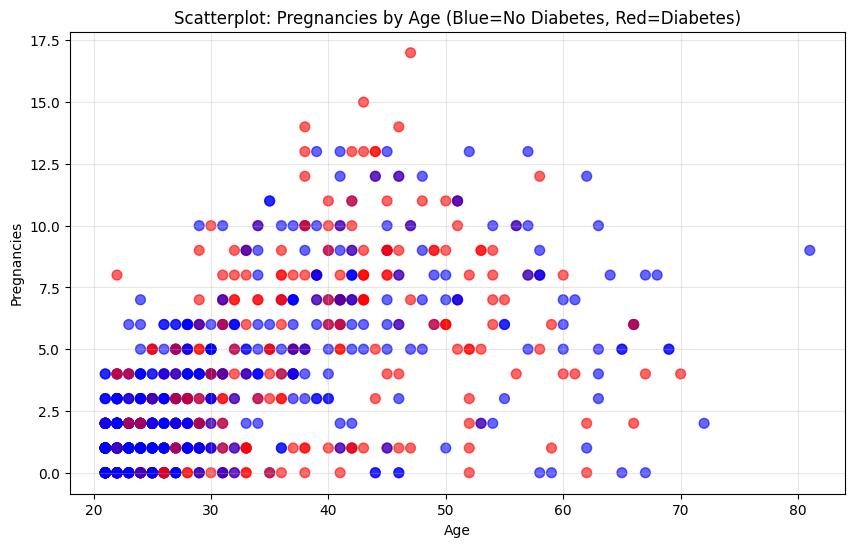

In [11]:
plt.figure(figsize=(10, 6))
colors = ['blue' if outcome == 0 else 'red' for outcome in diabetesData['Outcome']]
plt.scatter(diabetesData['Age'], diabetesData['Pregnancies'], 
           c=colors, alpha=0.6, s=50)
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.title('Scatterplot: Pregnancies by Age (Blue=No Diabetes, Red=Diabetes)')
plt.grid(True, alpha=0.3)
plt.show()